In [1]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [2]:
housing_price_index = pd.read_csv('/home/apoorva/Documents/Office Laptop Material/ML Practice/HOusing Price/monthly-hpi.csv')
unemployment = pd.read_csv('/home/apoorva/Documents/Office Laptop Material/ML Practice/HOusing Price/unemployment-macro.csv')
federal_funds_rate = pd.read_csv('/home/apoorva/Documents/Office Laptop Material/ML Practice/HOusing Price/fed_funds.csv')
shiller = pd.read_csv('/home/apoorva/Documents/Office Laptop Material/ML Practice/HOusing Price/shiller.csv')
gross_domestic_product = pd.read_csv('/home/apoorva/Documents/Office Laptop Material/ML Practice/HOusing Price/gdp.csv')  

In [3]:
# merging dataframes into single dataframe by date
df = (shiller.merge(housing_price_index, on='date')
                    .merge(unemployment, on='date')
                    .merge(federal_funds_rate, on='date')
                    .merge(gross_domestic_product, on='date'))

In [4]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


OLS measures the accuracy of a linear regression model.

setting up a simple linear regression model with total_unemploymentas our predictor variable [OLS is built on assumptions]

In [5]:
# fitting the model with .fit() and showing results
# using statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()

# summarizing our model
housing_model_summary = housing_model.summary()

# converting table to HTML and adding colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

Adj. R-squared -> 95% of housing prices can be explained by our predictor variable, total_unemployed.

regression coefficient (coef)  -> one unit increase in total_unemployed reduces housing_price_index by 8.33.
In line with our assumptions, an increase in unemployment appears to reduce housing prices.

standard error-> 0.41, is low and therefore appears accurate.

The p-value->  the probability of an 8.33 decrease in housing_price_index due to a one unit increase in 
total_unemployed is 0%, assuming there is no relationship between the two variables. 
A low p-value indicates that the results are statistically significant, 
that is in general the p-value is less than 0.05.

We can be 95% confident that total_unemployed's coefficient will be within our confidence interval, [-9.185, -7.480].



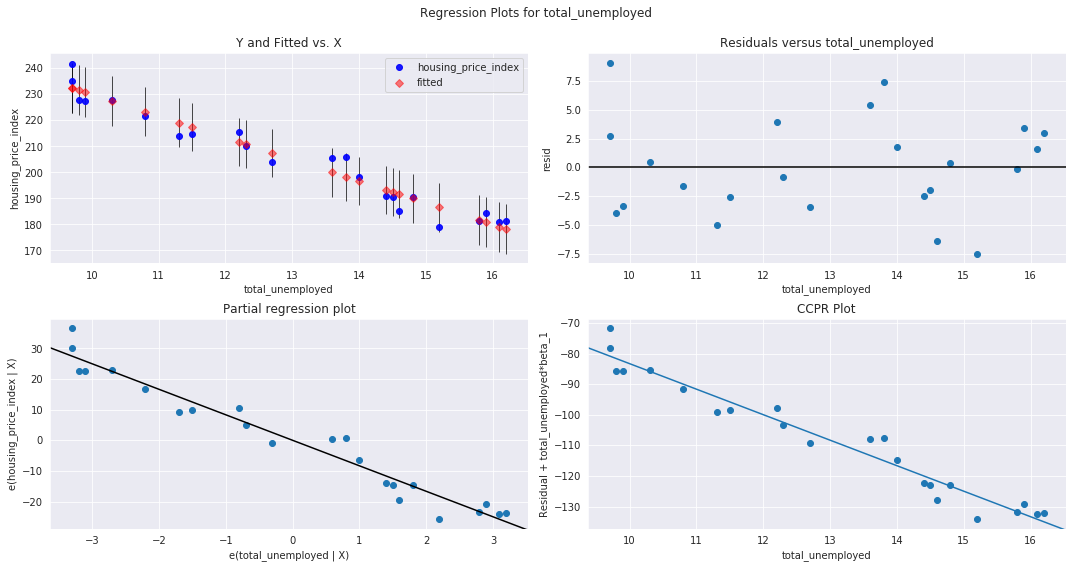

In [7]:
# Plotting four regression plots for total_unemployed

fig = plt.figure(figsize=(15,8))

# passing the model as the first parameter, then specifying the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)


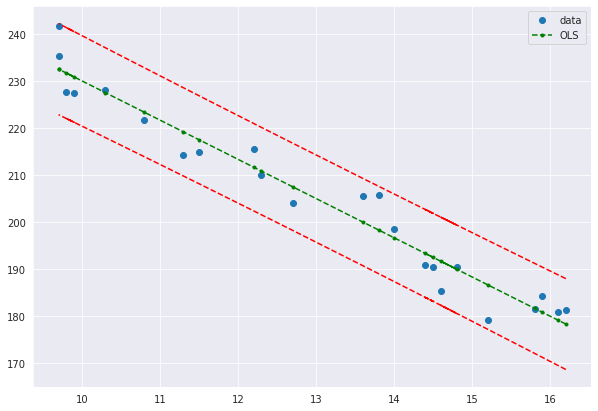

In [8]:

# predictor variable (x) and dependent variable (y)
x = df[['total_unemployed']]
y = df[['housing_price_index']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');





In [9]:

# again, invoke statsmodel's formula API using the below syntax
housing_model = ols("""housing_price_index ~ total_unemployed 
                                            + long_interest_rate 
                                            + federal_funds_rate
                                            + consumer_price_index 
                                            + gross_domestic_product""", data=df).fit()
# summarize our model
housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

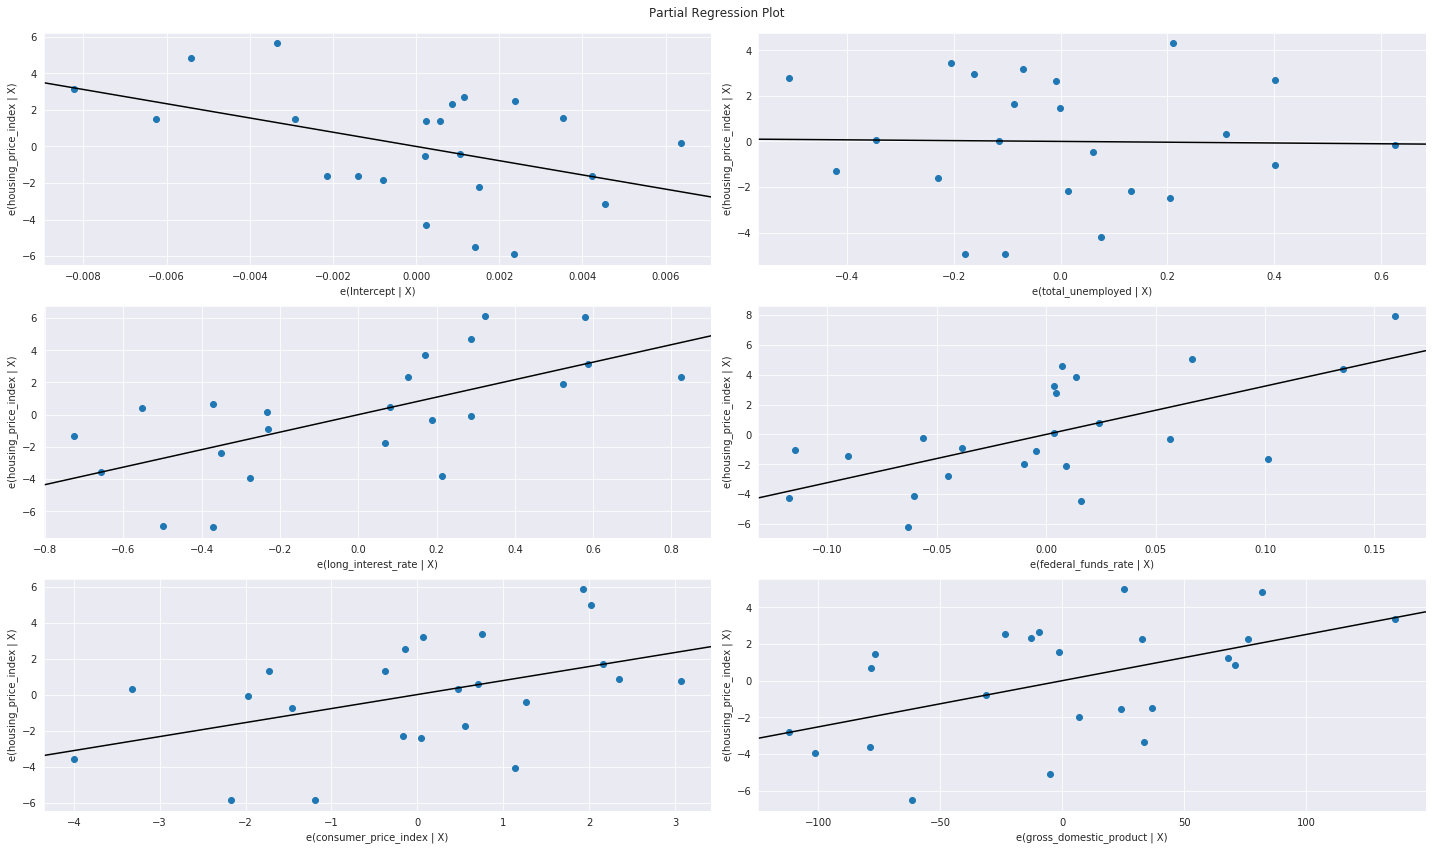

In [10]:

# this produces our six partial regression plots

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)